In [1]:
!pip install numpy==<desired_version>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `pip install numpy==<desired_version>'


In [2]:
!pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import pandas as pd

df = pd.read_csv('/kaggle/input/v-clean-tweet-final/v clean_Tweet final.csv')
df = df.astype(str)

In [5]:
df.head()

,Unnamed: 0,Date,clean_Tweet
0,0,2022-12-07,China announces rollback of COVID19 restrictio...
1,1,2022-12-07,Covid19 China announces general easing of its ...
2,2,2022-12-07,Hard to believe this time a year ago we were h...
3,3,2022-12-07,Until June 2021 there had been widespread hoar...
4,4,2022-12-07,The Hottest Picture China Recently Ending of C...


In [6]:
df.tail()

,Unnamed: 0,Date,clean_Tweet
10777,10777,2023-05-17,Sen Marco Rubio RFla this week released a leng...
10778,10778,2023-05-17,AUGMENTATION The action or process of making o...
10779,10779,2023-05-17,A Republicanled probe into the origins of Covi...
10780,10780,2023-05-17,Beijings COVID19 cases have increased after th...
10781,10781,2023-05-17,From s new press release introducing his offic...


In [7]:
df.isnull().sum()

Unnamed: 0     0
Date           0
clean_Tweet    0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'clean_Tweet'], dtype='object')

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,Date,clean_Tweet
0,2022-12-07,China announces rollback of COVID19 restrictio...
1,2022-12-07,Covid19 China announces general easing of its ...
2,2022-12-07,Hard to believe this time a year ago we were h...
3,2022-12-07,Until June 2021 there had been widespread hoar...
4,2022-12-07,The Hottest Picture China Recently Ending of C...


In [11]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
def getSubjectivity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(clean_Tweet):
  return TextBlob(clean_Tweet).sentiment.polarity
# Create two new columns
df['Subjectivity']=df['clean_Tweet'].apply(getSubjectivity)
df['Polarity']=df['clean_Tweet'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Date,clean_Tweet,Subjectivity,Polarity
0,2022-12-07,China announces rollback of COVID19 restrictio...,0.100000,0.000000
1,2022-12-07,Covid19 China announces general easing of its ...,0.250000,0.025000
2,2022-12-07,Hard to believe this time a year ago we were h...,0.520833,-0.077652
3,2022-12-07,Until June 2021 there had been widespread hoar...,0.666667,0.466667
4,2022-12-07,The Hottest Picture China Recently Ending of C...,0.250000,-0.100000
...,...,...,...,...
10777,2023-05-17,Sen Marco Rubio RFla this week released a leng...,0.500000,0.500000
10778,2023-05-17,AUGMENTATION The action or process of making o...,0.484091,0.197727
10779,2023-05-17,A Republicanled probe into the origins of Covi...,0.625000,0.125000
10780,2023-05-17,Beijings COVID19 cases have increased after th...,0.000000,0.000000


In [13]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataFrame
df

,Date,clean_Tweet,Subjectivity,Polarity,Analysis
0,2022-12-07,China announces rollback of COVID19 restrictio...,0.100000,0.000000,Neutral
1,2022-12-07,Covid19 China announces general easing of its ...,0.250000,0.025000,Positive
2,2022-12-07,Hard to believe this time a year ago we were h...,0.520833,-0.077652,Negative
3,2022-12-07,Until June 2021 there had been widespread hoar...,0.666667,0.466667,Positive
4,2022-12-07,The Hottest Picture China Recently Ending of C...,0.250000,-0.100000,Negative
...,...,...,...,...,...
10777,2023-05-17,Sen Marco Rubio RFla this week released a leng...,0.500000,0.500000,Positive
10778,2023-05-17,AUGMENTATION The action or process of making o...,0.484091,0.197727,Positive
10779,2023-05-17,A Republicanled probe into the origins of Covi...,0.625000,0.125000,Positive
10780,2023-05-17,Beijings COVID19 cases have increased after th...,0.000000,0.000000,Neutral


In [19]:
pos_tokens = [token for line in df[df['Analysis'] == 'Positive']['clean_Tweet'] for token in line.split()]
neg_tokens = [token for line in df[df['Analysis'] == 'Negative']['clean_Tweet'] for token in line.split()]
neut_tokens = [token for line in df[df['Analysis'] == 'Neutral']['clean_Tweet'] for token in line.split()]


In [22]:
pos_tokens

['Covid19',
 'China',
 'announces',
 'general',
 'easing',
 'of',
 'its',
 'zero',
 'Covid',
 'policy',
 'according',
 'to',
 'local',
 'healthauthorities',
 'Until',
 'June',
 '2021',
 'there',
 'had',
 'been',
 'widespread',
 'hoarding',
 'of',
 'Covid19',
 'vaccines',
 'worldwide',
 'China',
 'believes',
 'that',
 'lives',
 'in',
 'Chinaother',
 'nations',
 'are',
 'equally',
 'important',
 'Given',
 'the',
 'spread',
 'of',
 'Covid19',
 'no',
 'nations',
 'safe',
 'until',
 'every',
 'nations',
 'safe',
 'Thats',
 'why',
 'helping',
 'others',
 'is',
 'helping',
 'ourselves',
 'Today',
 'in',
 '2019',
 'the',
 'first',
 'case',
 'of',
 'COVID19',
 'is',
 'confirmed',
 'in',
 'China',
 'Today',
 'in',
 '2019',
 'marks',
 'the',
 'first',
 'confirmed',
 'case',
 'of',
 'COVID19',
 'in',
 'Wuhan',
 'ChinaIts',
 'just',
 'three',
 'years',
 'ago',
 'but',
 'the',
 'world',
 'was',
 'never',
 'the',
 'same',
 'since',
 'OnThisDay',
 'DEC',
 '8TH',
 '2019First',
 'confirmed',
 'case',
 '

In [23]:
# Get Most Commonest Keywords
from collections import Counter

In [24]:
#creating function for getting most common words up to 20
def get_tokens(docx,num=20):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [25]:
#creating function for getting most common top 10
def get_top_tokens(docx,num=10):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [26]:
get_tokens(pos_tokens)

{'the': 6833,
 'China': 4395,
 'of': 4199,
 'to': 3943,
 'in': 3636,
 'COVID19': 3573,
 'and': 2809,
 'a': 2394,
 'for': 1576,
 'on': 1564,
 'is': 1466,
 'from': 1365,
 'Covid19': 1358,
 'Chinas': 1231,
 'that': 1025,
 'has': 935,
 'its': 920,
 'with': 907,
 'The': 872,
 'as': 863}

In [27]:
get_top_tokens(pos_tokens)

{'the': 6833,
 'China': 4395,
 'of': 4199,
 'to': 3943,
 'in': 3636,
 'COVID19': 3573,
 'and': 2809,
 'a': 2394,
 'for': 1576,
 'on': 1564}

In [28]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [29]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [30]:
neg_df

,words,scores
0,the,2715
1,China,2152
2,to,1978
3,of,1671
4,in,1616
5,COVID19,1494
6,and,1244
7,a,1239
8,is,829
9,from,805


# MOST REPEATED NEGATIVE WORDS

<AxesSubplot: xlabel='words', ylabel='scores'>

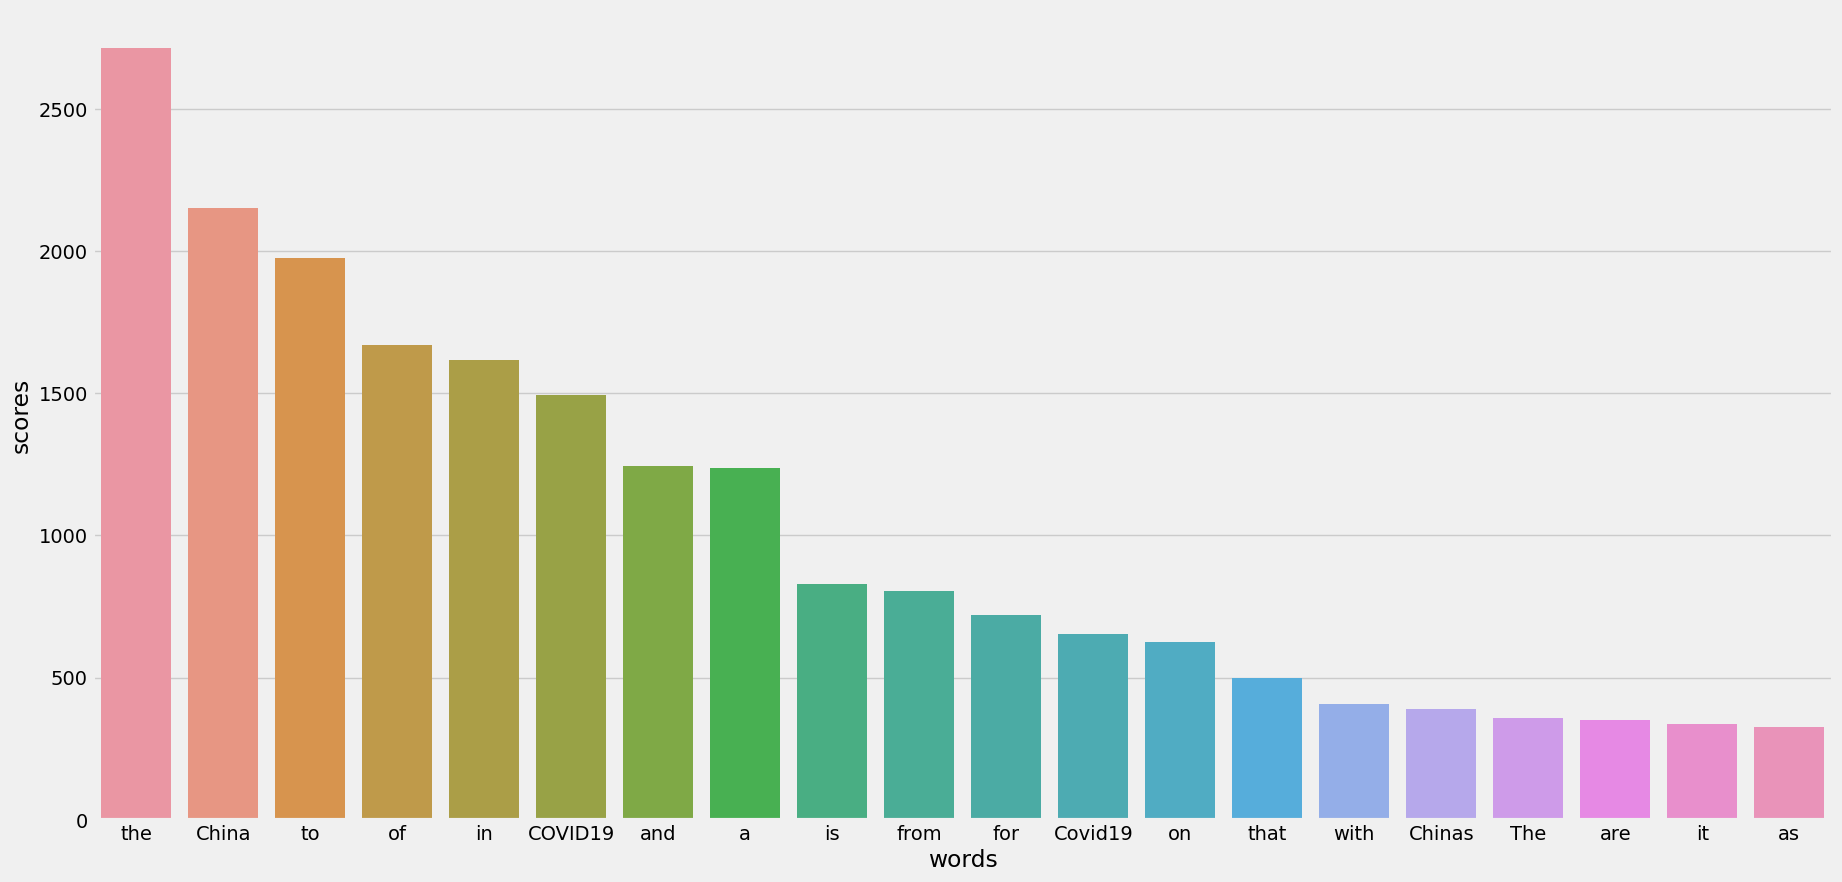

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)

# MOST REPEATED POSITIVE WORDS

<AxesSubplot: xlabel='words', ylabel='scores'>

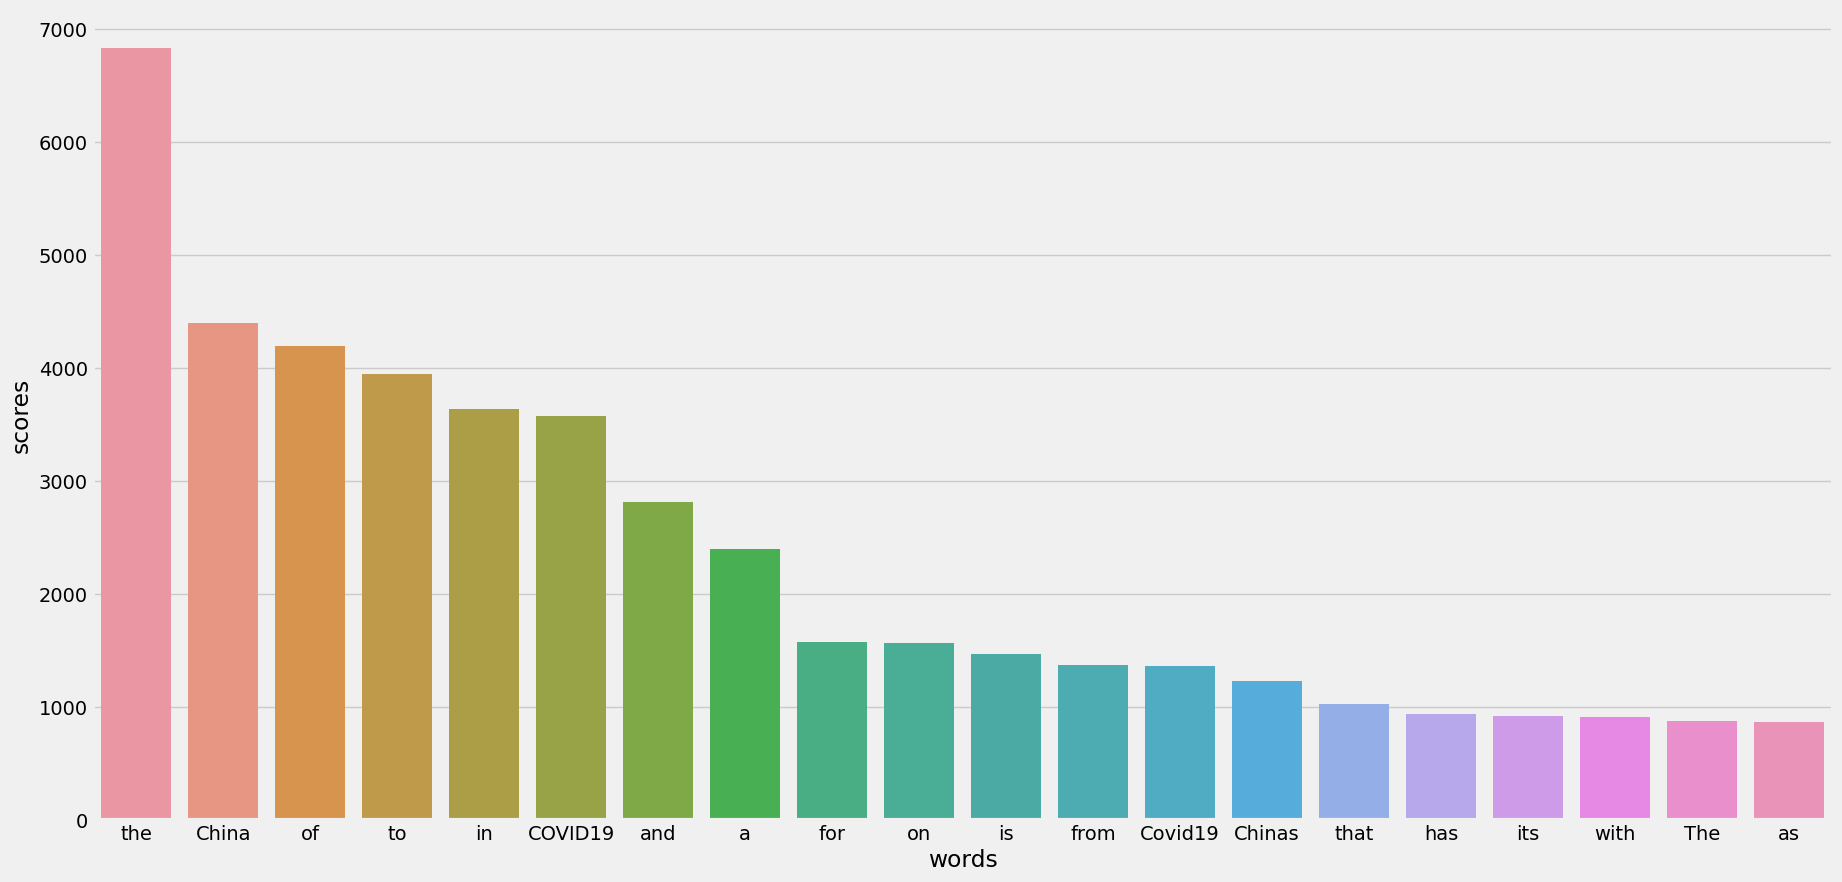

In [32]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)

# MOST REPEATED Neutral WORDS

<AxesSubplot: xlabel='words', ylabel='scores'>

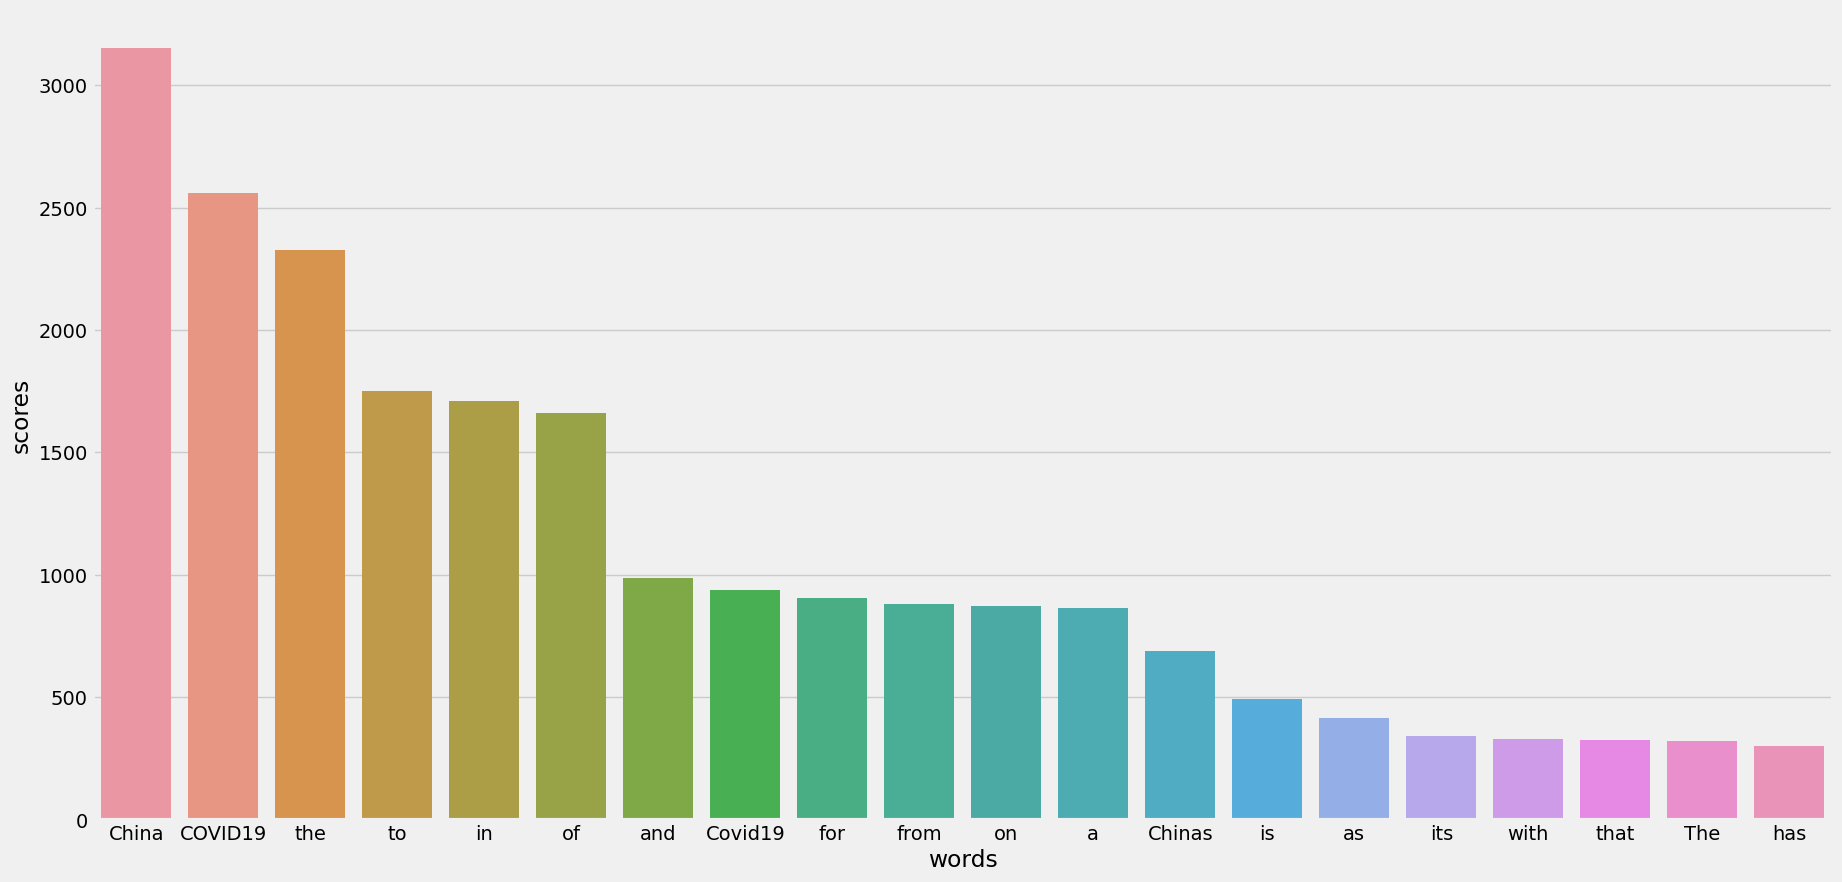

In [33]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)

TRYING ON ANOTHER WAY BY USING WORD CLOUD

In [34]:
### Word Cloud
from wordcloud import WordCloud

In [35]:
# CREATING A FUNCTION FOR DATA VIGULATION
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [36]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

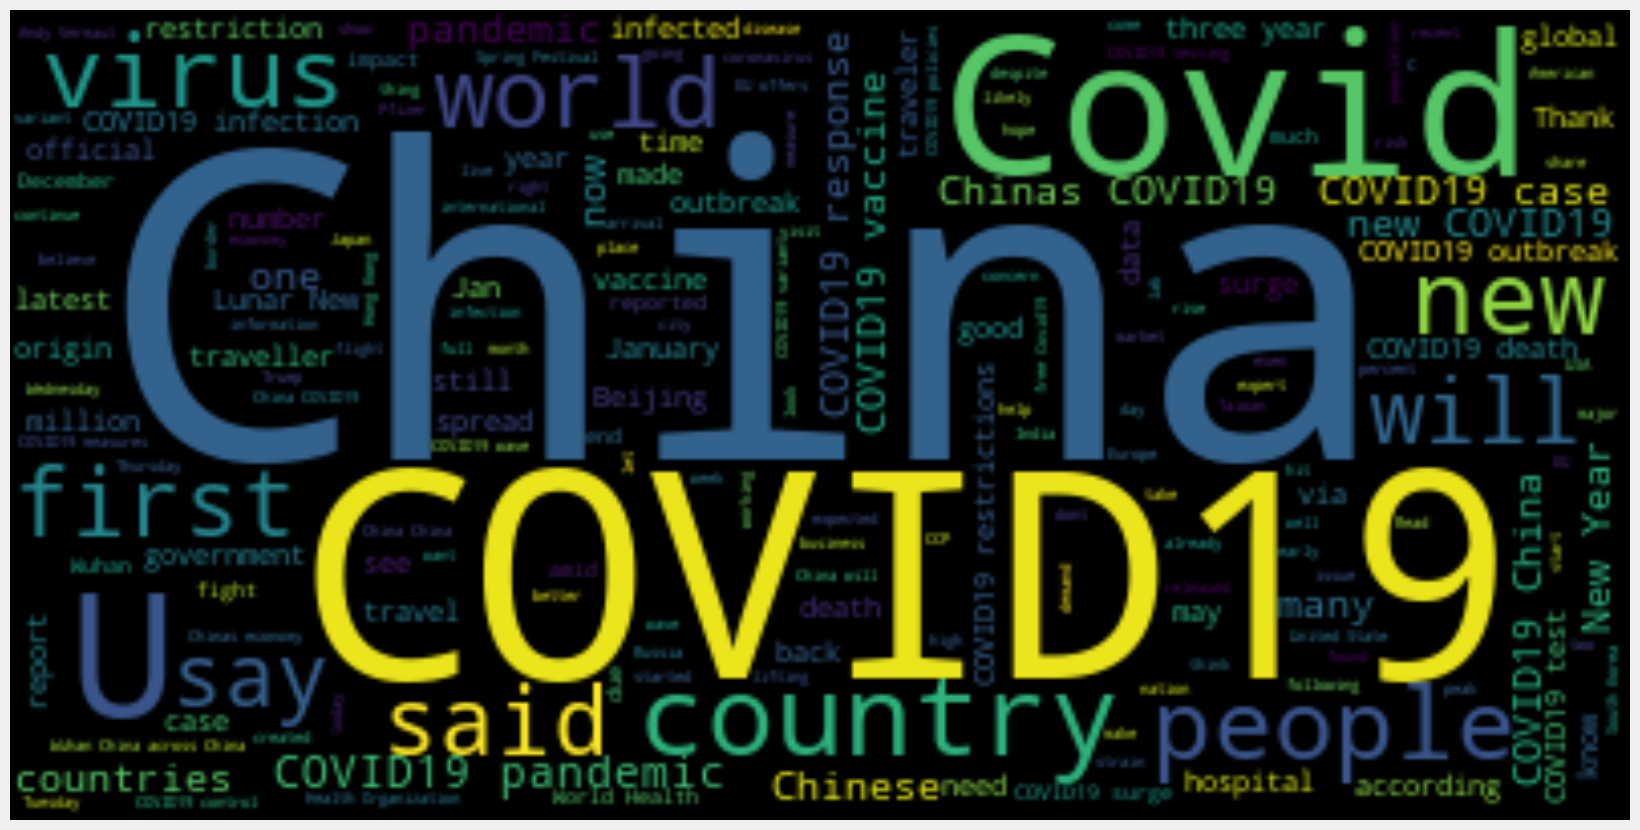

In [37]:
plot_wordcloud(pos_docx)

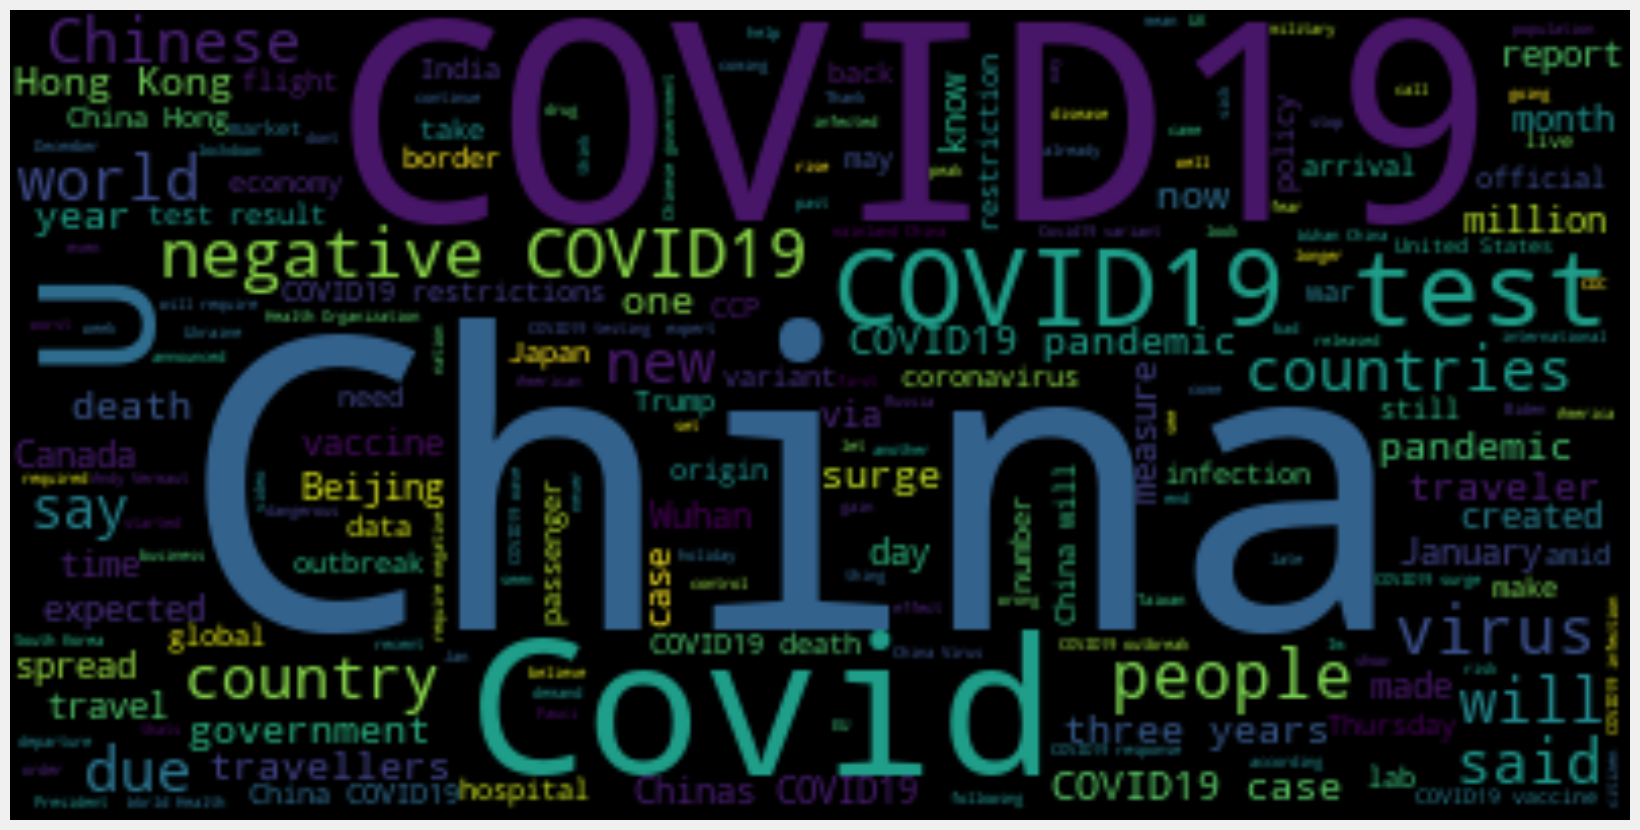

In [38]:
plot_wordcloud(neg_docx)

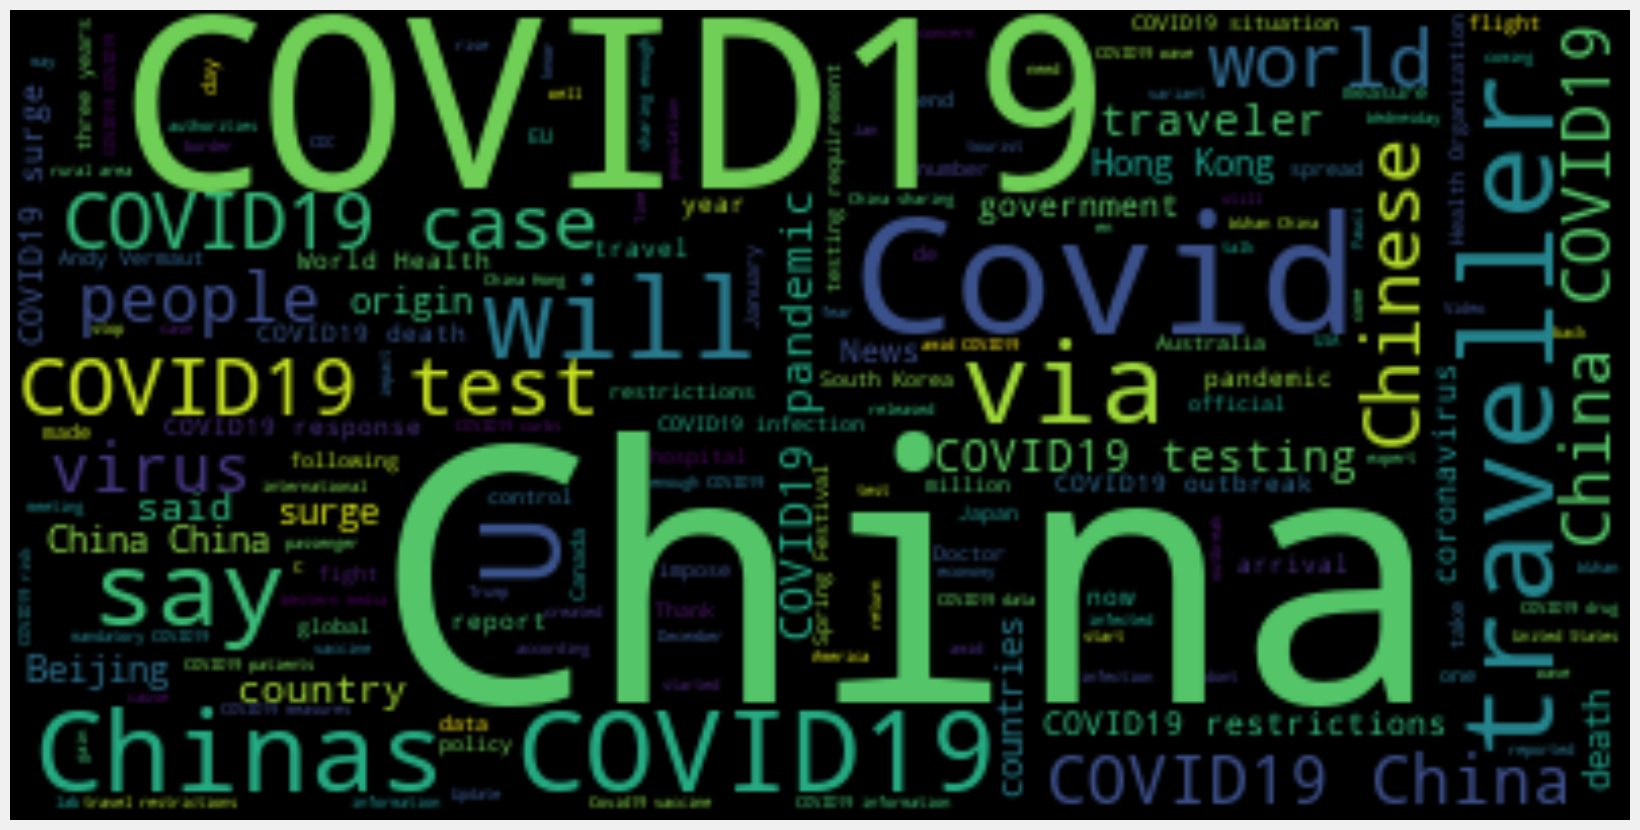

In [39]:
plot_wordcloud(neu_docx)

## MODEL TRAINING

In [41]:
clean_tweet = df['clean_Tweet'] 

In [42]:
#one hot encoding
sentiment_map = {"Extremely Negative":-1, "Negative":-1,"Neutral":0, "Positive":1,"Extremely Positive":1}
df['Analysis'] = df['Analysis'].map(sentiment_map)

<AxesSubplot: xlabel='Analysis', ylabel='count'>

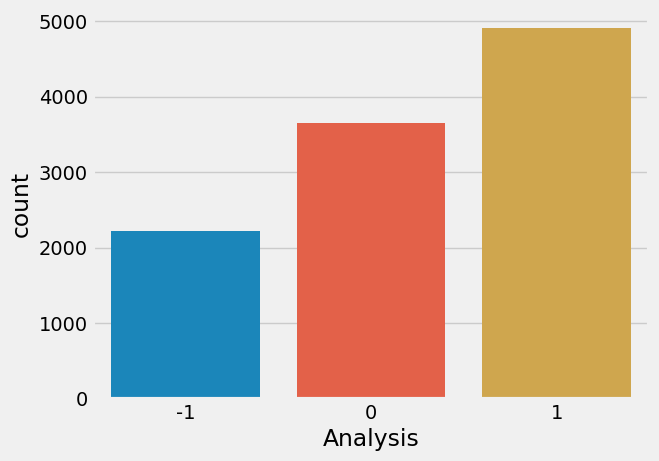

In [43]:
sns.countplot(x='Analysis', data=df)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [44]:
new_df = df #To protect the data frem we created new data frem as copy

In [45]:
new_df.head(1)

,Date,clean_Tweet,Subjectivity,Polarity,Analysis
0,2022-12-07,China announces rollback of COVID19 restrictio...,0.1,0.0,0


In [47]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['clean_Tweet'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [C, h, n,  , n, n, u, n, c, e,  , r, l, l, b, ...
1        [C, v, 1, 9,  , C, h, n,  , n, n, u, n, c, e, ...
2        [H, r,  ,  , b, e, l, e, v, e,  , h,  , e,  , ...
3        [U, n, l,  , J, u, n, e,  , 2, 0, 2, 1,  , h, ...
4        [T, h, e,  , H, e,  , P, c, u, r, e,  , C, h, ...
                               ...                        
10777    [S, e, n,  , M, r, c,  , R, u, b,  , R, F, l, ...
10778    [A, U, G, M, E, N, T, A, T, I, O, N,  , T, h, ...
10779    [A,  , R, e, p, u, b, l, c, n, l, e,  , p, r, ...
10780    [B, e, j, n, g,  , C, O, V, I, D, 1, 9,  , c, ...
10781    [F, r,  ,  , n, e, w,  , p, r, e,  , r, e, l, ...
Name: clean_Tweet, Length: 10782, dtype: object

In [48]:
ps=PorterStemmer()
lem=WordNetLemmatizer()

In [49]:
corpus=[]
for i in range(0,len(new_df)):
  review=re.sub('[^a-zA-Z]'," ",new_df['clean_Tweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)

In [50]:
new_df1 = new_df[['clean_Tweet', 'Analysis']]
new_df1.shape

(10782, 2)

In [51]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df1,test_size = 0.2,random_state=24,stratify = new_df1.Analysis.values) 
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (8625, 2)
test shape :  (2157, 2)


## Use Of Counter Vectorizer For Multi Class Classification for the best accuracy 

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_Tweet.values)
X_test = vectorizer.transform(test.clean_Tweet.values)

y_train = train.Analysis.values
y_test = test.Analysis.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (8625, 19001)
X_test.shape :  (2157, 19001)
y_train.shape :  (8625,)
y_test.shape :  (2157,)


# Naive Bayes Classifier for MULTICLASS Classification

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

naiveBayes_clf = MultinomialNB(alpha=0.1, fit_prior=False)
naiveBayes_clf.fit(X_train, y_train)

NB_prediction = naiveBayes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test, NB_prediction)
print("Training accuracy Score    : ", naiveBayes_clf.score(X_train, y_train))
print("Validation accuracy Score : ", NB_accuracy)
print(classification_report(NB_prediction, y_test))


Training accuracy Score    :  0.9371594202898551
Validation accuracy Score :  0.7148817802503477
              precision    recall  f1-score   support

          -1       0.70      0.54      0.61       582
           0       0.65      0.85      0.74       559
           1       0.77      0.74      0.75      1016

    accuracy                           0.71      2157
   macro avg       0.71      0.71      0.70      2157
weighted avg       0.72      0.71      0.71      2157



In [54]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8833623188405797
Validation accuracy Score :  0.7037552155771906
              precision    recall  f1-score   support

          -1       0.53      0.66      0.58       356
           0       0.57      0.85      0.68       491
           1       0.88      0.66      0.76      1310

    accuracy                           0.70      2157
   macro avg       0.66      0.72      0.67      2157
weighted avg       0.75      0.70      0.71      2157



In [55]:
mlb = MultinomialNB()
mlb.fit(X_train,y_train)
y_pred=mlb.predict(X_test)
cross_val_score(mlb,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7030759262595005

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [57]:
accuracy_rf=accuracy_score(y_test,Y_pred_rf)
accuracy_rf

0.8196569309225776

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8266110338433009
              precision    recall  f1-score   support

          -1       0.55      0.91      0.69       268
           0       0.93      0.79      0.86       863
           1       0.87      0.83      0.85      1026

    accuracy                           0.83      2157
   macro avg       0.79      0.85      0.80      2157
weighted avg       0.86      0.83      0.83      2157



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.9951304347826087
Validation accuracy Score :  0.8312471024571164
              precision    recall  f1-score   support

          -1       0.79      0.68      0.73       444
           0       0.81      0.90      0.86       731
           1       0.86      0.85      0.85       982

    accuracy                           0.83      2157
   macro avg       0.82      0.81      0.81      2157
weighted avg       0.83      0.83      0.83      2157



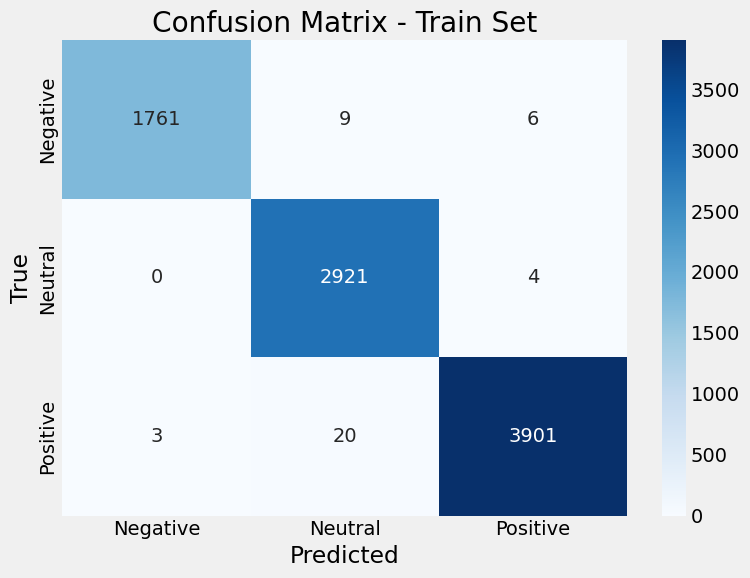

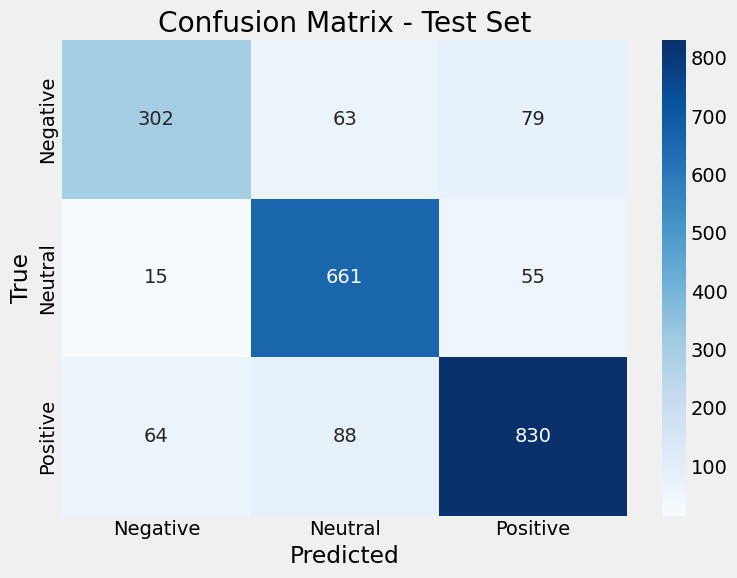

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
logreg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the classes for the train and test data
logreg_train_prediction = logreg.predict(X_train)
logreg_test_prediction = logreg.predict(X_test)

# Calculate accuracy scores
logreg_train_accuracy = accuracy_score(y_train, logreg_train_prediction)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_prediction)
print("Training accuracy Score    : ", logreg_train_accuracy)
print("Validation accuracy Score : ", logreg_test_accuracy)

# Print classification report for the test data
print(classification_report(y_test, logreg_test_prediction))

# Create confusion matrices
train_cm = confusion_matrix(y_train, logreg_train_prediction)
test_cm = confusion_matrix(y_test, logreg_test_prediction)

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Plot the confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train Set')

# Save the train confusion matrix figure with tight layout and transparent background
plt.tight_layout()
plt.savefig('train_confusion_matrix.png', transparent=True, bbox_inches='tight')

# Plot the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Save the test confusion matrix figure with tight layout and transparent background
plt.tight_layout()
plt.savefig('test_confusion_matrix.png', transparent=True, bbox_inches='tight')


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.9951304347826087
Validation accuracy Score :  0.8312471024571164
              precision    recall  f1-score   support

          -1       0.79      0.68      0.73       444
           0       0.81      0.90      0.86       731
           1       0.86      0.85      0.85       982

    accuracy                           0.83      2157
   macro avg       0.82      0.81      0.81      2157
weighted avg       0.83      0.83      0.83      2157



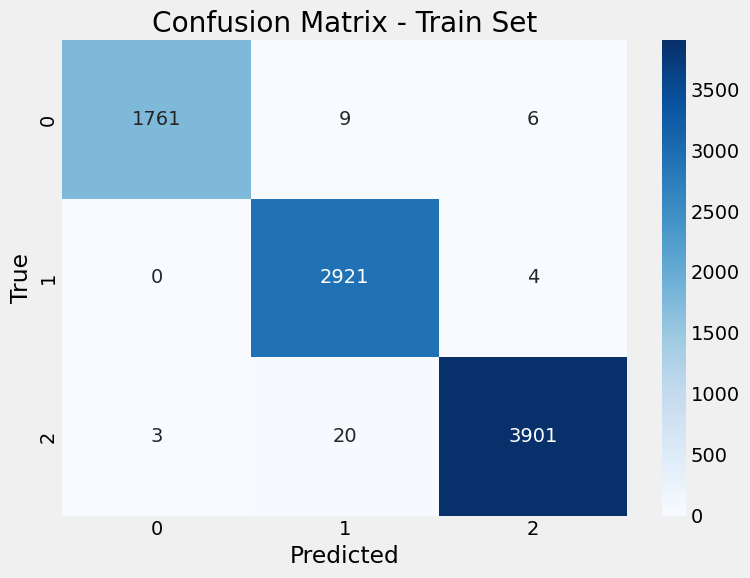

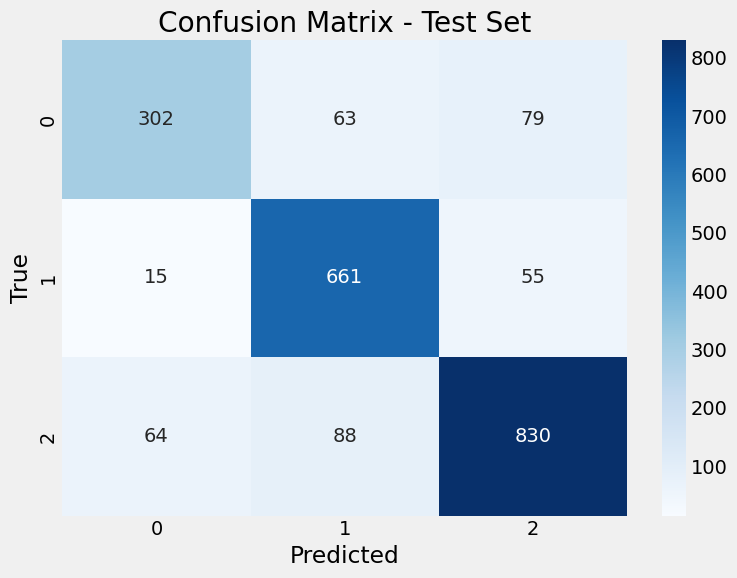

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
logreg = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the classes for the train and test data
logreg_train_prediction = logreg.predict(X_train)
logreg_test_prediction = logreg.predict(X_test)

# Calculate accuracy scores
logreg_train_accuracy = accuracy_score(y_train, logreg_train_prediction)
logreg_test_accuracy = accuracy_score(y_test, logreg_test_prediction)
print("Training accuracy Score    : ", logreg_train_accuracy)
print("Validation accuracy Score : ", logreg_test_accuracy)

# Print classification report for the test data
print(classification_report(y_test, logreg_test_prediction))

# Create confusion matrices
train_cm = confusion_matrix(y_train, logreg_train_prediction)
test_cm = confusion_matrix(y_test, logreg_test_prediction)

# Plot the confusion matrix for train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Train Set')

# Save the train confusion matrix figure with tight layout and transparent background
plt.tight_layout()
plt.savefig('train_confusion_matrix.png', transparent=True, bbox_inches='tight')

# Plot the confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Save the test confusion matrix figure with tight layout and transparent background
plt.tight_layout()
plt.savefig('test_confusion_matrix.png', transparent=True, bbox_inches='tight')


In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9951304347826087
Validation accuracy Score :  0.8312471024571164
              precision    recall  f1-score   support

          -1       0.68      0.79      0.73       381
           0       0.90      0.81      0.86       812
           1       0.85      0.86      0.85       964

    accuracy                           0.83      2157
   macro avg       0.81      0.82      0.81      2157
weighted avg       0.84      0.83      0.83      2157



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XG BOOST( BINARY CLASSIFICATION)

In [81]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Transform class labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

xgboost_clf = xgb.XGBClassifier()
xgboost_clf.fit(X_train, y_train_encoded)

# Transform test data labels as well
y_test_encoded = label_encoder.transform(y_test)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test_encoded, xgb_prediction)
print("Training accuracy Score: ", xgboost_clf.score(X_train, y_train_encoded))
print("Validation accuracy Score: ", xgb_accuracy)
print(classification_report(xgb_prediction, y_test_encoded))


Training accuracy Score:  0.8825507246376811
Validation accuracy Score:  0.8280018544274456
              precision    recall  f1-score   support

           0       0.62      0.87      0.73       319
           1       0.97      0.75      0.85       948
           2       0.81      0.90      0.85       890

    accuracy                           0.83      2157
   macro avg       0.80      0.84      0.81      2157
weighted avg       0.86      0.83      0.83      2157



## SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [83]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.960463768115942
Validation accuracy Score :  0.7695873898933704
              precision    recall  f1-score   support

          -1       0.44      0.87      0.59       226
           0       0.84      0.76      0.80       813
           1       0.86      0.76      0.81      1118

    accuracy                           0.77      2157
   macro avg       0.72      0.79      0.73      2157
weighted avg       0.81      0.77      0.78      2157



## Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and fit the SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', random_state=0, max_iter=1000, alpha=0.0001)
sgd_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_prediction)
print("Training accuracy Score    : ", sgd_clf.score(X_train, y_train))
print("Validation accuracy Score : ", sgd_accuracy)
print(classification_report(sgd_prediction, y_test))


Training accuracy Score    :  0.9984927536231885
Validation accuracy Score :  0.8252202132591563
              precision    recall  f1-score   support

          -1       0.69      0.80      0.74       387
           0       0.87      0.81      0.84       783
           1       0.85      0.85      0.85       987

    accuracy                           0.83      2157
   macro avg       0.80      0.82      0.81      2157
weighted avg       0.83      0.83      0.83      2157



In [85]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

[[1774    0    2]
 [   0 2923    2]
 [   2    7 3915]]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

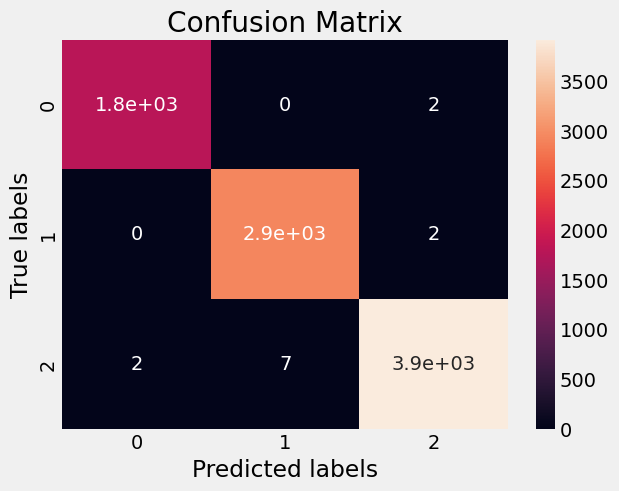

In [86]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [87]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_test)

score =accuracy_score(y_test,y_pred)
print('accuracy is', score)

accuracy is 0.8252202132591563


In [88]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_test,y_test)
print('scikit score:', scikit_score)

scikit score: 0.8252202132591563


In [89]:
# Very low type 1 and type 2 error
confusion_matrix(y_test,y_pred)

array([[308,  59,  77],
       [ 23, 635,  73],
       [ 56,  89, 837]])

## EVALUATION OF ALL BINARY CLASSIFICATION MODELS

In [92]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.831247
5,XGBoost,0.828002
2,Random Forest,0.826611
4,Stochastic Gradient Decent,0.825220
0,Support Vector Machines,0.769587
3,Naive Bayes,0.714882


# Concluson

We described the preprocessing steps, and pipeline steps within which text
normalization and model cross-validation is included, and performance
has been measured using balanced accuracy, f1 score etc. We
concentrated on feeding our model with word count information. We
assume, in the case of binary classification, we can further improve this
score.